# Fake News Detection


Fake news detection is a process that involves analyzing news content to determine its truthfulness. It is a subtask of text classification, and is defined as the task of classifying news as real or fake.

About the Dataset:
1. title, the title of a news article
2. text, the text of the article
3. subject, the category of a news article
4. date, the publication date of an article

# Import all required libraries

In [1]:
import pandas as pd
import numpy as np

C:\Users\maks1\AppData\Local\Temp\ipykernel_11000\2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [41]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#from zipfile import ZipFile
#from datetime import datetime

#import re  # regular expression lib
#from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer  # strip words of prefix and postfix
#from sklearn.feature_extraction.text import TfidfVectorizer  # convert text into value features
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score


In [19]:
!pip install spacy
!python -m spacy download en_core_web_lg

  Using cached spacy-3.7.4-cp311-cp311-win_amd64.whl.metadata (27 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached murmurhash-1.0.10-cp311-cp311-win_amd64.whl.metadata (2.0 kB)
  Using cached cymem-2.0.8-cp311-cp311-win_amd64.whl.metadata (8.6 kB)
  Using cached preshed-3.0.9-cp311-cp311-win_amd64.whl.metadata (2.2 kB)
  Using cached thinc-8.2.3-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached wasabi-1.1.2-py3-none-any.whl.metadata (28 kB)
  Using cached srsly-2.4.8-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.3.4-py3-none-any.whl.metadata (4.7 kB)
  Using cached typer-0.9.0-py3-none-any.whl.metadata (14 kB)
  Using cached smart_open-6.4.0-py3-none-any.whl.metadata (21 kB)
  Using cached pydantic-2.6.2-py3-none-any.whl.metadata (83 kB)
  Using cached langcodes-3.3.0-py3-none-any.


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     -------------------------------------- 0.0/587.7 MB 165.2 kB/s eta 0:59:19
     -------------------------------------- 0.0/587.7 MB 187.9 kB/s eta 0:52:08
     -------------------------------------- 0.1/587.7 MB 328.6 kB/s eta 0:29:49
     ---------------------------------------- 0.2/587.7 MB 1.0 MB/s eta 0:09:44
     ---------------------------------------- 0.4/587.7 MB 1.4 MB/s eta 0:06:46
     ---------------------------------------- 0.9/587.7 MB 2.6 MB/s eta 0:03:45
     ---------------------------------------- 1.9/587.7 MB 4.8 MB/s eta 0:02:03
     ---------------------------------------- 2.4/587.7 MB 5.5 MB/s eta 0:01:47
     ---------------------------------------- 3.1/587.7 MB 6.4 MB/s eta 0:01:31
     ---------------------------------------- 3.7/587.7 MB 7.0 MB/s eta 0:01:24
     ---------------------------------------- 3.9/587.


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [25]:
#import nltk
#nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Examples of stopwords in English

In [27]:
#print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Load input data

In [7]:
with ZipFile('D:/Learning_py/kaggle/NLP_Fake_news_detection/input_data/fake.csv.zip', 'r') as fake:
    fake.extractall('D:/Learning_py/kaggle/NLP_Fake_news_detection/input_data/')

In [8]:
with ZipFile('D:/Learning_py/kaggle/NLP_Fake_news_detection/input_data/true.csv.zip', 'r') as true:
    true.extractall('D:/Learning_py/kaggle/NLP_Fake_news_detection/input_data/')

In [2]:
fake_news = pd.read_csv('D:/Learning_py/kaggle/NLP_Fake_news_detection/input_data/fake.csv')
true_news = pd.read_csv('D:/Learning_py/kaggle/NLP_Fake_news_detection/input_data/true.csv')

In [11]:
fake_news.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [12]:
true_news.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

Merge all news in solid dataframe with "target" column:
* 0 - Fake news
* 1 - True news

In [3]:
def combine_data(true_data, false_data):
    true_data['target'] = 1
    false_data['target'] = 0
    all_data = pd.concat([true_data, false_data])

    print("True shape: ", true_data.shape)
    print("False shape: ", false_data.shape)
    print("All data shape: ", all_data.shape)

    return all_data.sample(frac=1).reset_index(drop=True)

In [4]:
all_news = combine_data(true_news, fake_news)

True shape:  (21417, 5)
False shape:  (23481, 5)
All data shape:  (44898, 5)


# Exploration

The amount of missed values.

In [64]:
all_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [65]:
all_news.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

News distribution True : Fake

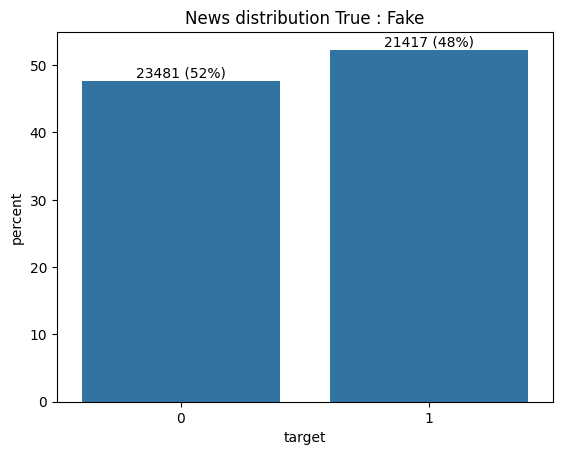

In [66]:
ax = sns.countplot(x=all_news["target"], stat='percent')

abs_values = all_news['target'].value_counts()
rel_values = all_news['target'].value_counts(normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)
plt.title('News distribution True : Fake')
plt.show()

Date distribution based on Subject.

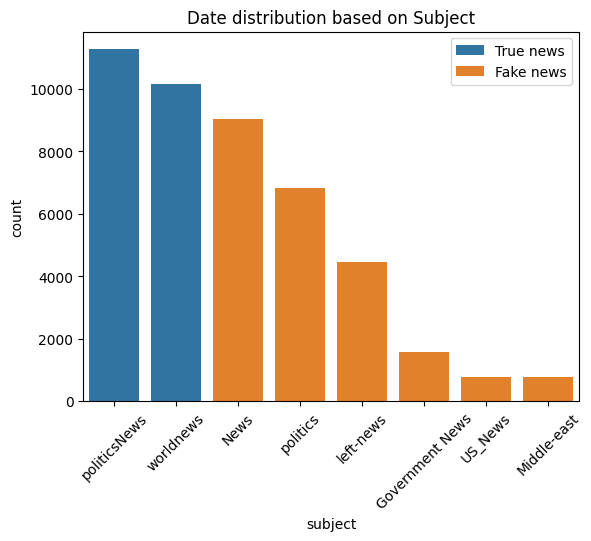

In [67]:
sns.countplot(data=all_news, x='subject', order=all_news['subject'].value_counts(ascending=False).index, hue='target')
plt.xticks(rotation=45)
plt.title('Date distribution based on Subject')
plt.legend(["True news", "Fake news"])
plt.show()

Explore the time interval.

Some records contain link instead of date in this feature, so it is better to get rid of them. Mostly date contains no more than 19 characters, so others can be elliminated.

In [98]:
index_to_drop = list()
for index, rec in zip(all_news['date'].sort_values().index, all_news['date'].sort_values().values):
    if len(rec) > 20:
        index_to_drop.append(index)
        print(rec, len(rec))

MSNBC HOST Rudely Assumes Steel Worker Would Never Let His Son Follow in His Footsteps…He Couldn’t Be More Wrong [Video] 120
https://100percentfedup.com/12-yr-old-black-conservative-whose-video-to-obama-went-viral-do-you-really-love-america-receives-death-threats-from-left/ 149
https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/ 145
https://100percentfedup.com/video-hillary-asked-about-trump-i-just-want-to-eat-some-pie/ 88
https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg 66
https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg 66
https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg 66
https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg 74
https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg 74
https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg 74


In [100]:
all_news.loc[index_to_drop, 'date'] = np.NaN

In [104]:
pd.to_datetime(all_news.date).describe()

<ipython-input-104-4c8cca37de7e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  pd.to_datetime(all_news.date).describe()


count                   44888
unique                   1010
top       2017-12-20 00:00:00
freq                      197
first     2015-03-31 00:00:00
last      2018-02-19 00:00:00
Name: date, dtype: object

So this dataframe contains records between 2015-03-31 and 2018-02-19.

# Proccessing

To use data for modeling it is required to create a single line for each row.

In [111]:
all_news['content'] = all_news['subject'] + ' ' + all_news['title'] # TBD (will be added later) + ' ' +	all_news['text']

In [112]:
all_news.head()

title  \
0  U.N. Security Council to meet Monday on North ...   
1  Libyan forces suffer casualties as fighting dr...   
2  BRILLIANT NIGEL FARAGE On How THE GOP Can Win ...   
3  Mattis reaffirms U.S. alliance with Japan 'for...   
4  Kansas budget woes weigh on state's credit rat...   

                                                text       subject  \
0  UNITED NATIONS (Reuters) - The United Nations ...     worldnews   
1  BENGHAZI, Libya (Reuters) - Libyan forces figh...     worldnews   
2  Former British lawmaker Nigel Farage, who succ...      politics   
3  TOKYO (Reuters) - U.S. Defense Secretary Jim M...  politicsNews   
4  (Reuters) - Moody’s Investors Service on Tuesd...  politicsNews   

                 date  target  \
0  September 3, 2017        0   
1  December 11, 2017        0   
2        Jul 18, 2016       1   
3   February 4, 2017        0   
4        May 3, 2016        0   

                                             content  
0  worldnews U.N. Security Council to meet Monday...  
1  worldnews Libyan forces suffer casualties as f...  
2  politics BRILLIANT NIGEL FARAGE On How THE GOP...  
3  politicsNews Mattis reaffirms U.S. alliance wi...  
4  politicsNews Kansas budget woes weigh on state...

Stem records (Process of reducing a word to its Root word)

In [113]:
port_stem = PorterStemmer()

In [114]:
def stemming(raw_text):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', raw_text)  # substitute everything except alphabetic values
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [115]:
all_news['content_stemmed'] = all_news['content'].apply(stemming)

In [116]:
all_news.head()

title  \
0  U.N. Security Council to meet Monday on North ...   
1  Libyan forces suffer casualties as fighting dr...   
2  BRILLIANT NIGEL FARAGE On How THE GOP Can Win ...   
3  Mattis reaffirms U.S. alliance with Japan 'for...   
4  Kansas budget woes weigh on state's credit rat...   

                                                text       subject  \
0  UNITED NATIONS (Reuters) - The United Nations ...     worldnews   
1  BENGHAZI, Libya (Reuters) - Libyan forces figh...     worldnews   
2  Former British lawmaker Nigel Farage, who succ...      politics   
3  TOKYO (Reuters) - U.S. Defense Secretary Jim M...  politicsNews   
4  (Reuters) - Moody’s Investors Service on Tuesd...  politicsNews   

                 date  target  \
0  September 3, 2017        0   
1  December 11, 2017        0   
2        Jul 18, 2016       1   
3   February 4, 2017        0   
4        May 3, 2016        0   

                                             content  \
0  worldnews U.N. Security Council to meet Monday...   
1  worldnews Libyan forces suffer casualties as f...   
2  politics BRILLIANT NIGEL FARAGE On How THE GOP...   
3  politicsNews Mattis reaffirms U.S. alliance wi...   
4  politicsNews Kansas budget woes weigh on state...   

                                     content_stemmed  
0  worldnew u n secur council meet monday north k...  
1  worldnew libyan forc suffer casualti fight dra...  
2  polit brilliant nigel farag gop win real ameri...  
3  politicsnew matti reaffirm u allianc japan yea...  
4  politicsnew kansa budget woe weigh state credi...

Split data and label into separate dataframes.

In [117]:
X, Y = all_news['content_stemmed'], all_news['target']
print(f"X has shape: {X.shape} \nY has shape: {Y.shape}")

X has shape: (44898,) 
Y has shape: (44898,)


Convert text to numeric data

In [118]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

Split data into train and test.

In [119]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123, stratify=Y)

# Feature Engineering

In [ ]:
# TBD

# Modeling

Training Logistic Regression model.

In [120]:
model_lr = LogisticRegression()

In [121]:
model_lr.fit(x_train, y_train)

LogisticRegression()

Evaluation

In [122]:
x_train_prediction = model_lr.predict(x_train)
train_accuracy = accuracy_score(y_train, x_train_prediction)

x_test_prediction = model_lr.predict(x_test)
test_accuracy = accuracy_score(y_test, x_test_prediction)

print(f"Accuracy: \n\tTrain: {train_accuracy} \n\tTest: {test_accuracy}")

Accuracy: 
	Train: 0.9999363624793178 
	Test: 0.9999257609502599


# Simple Predictive System

In [135]:
def news_converter(news_value):
  if news_value == 0:
      return 'Real'
  else:
      return 'Fake'

In [137]:
NEWS_ID = 50
sample_to_test = x_test[NEWS_ID]

prediction = model_lr.predict(sample_to_test)
print(f"Originally it was defined as {news_converter(y_test.iloc[NEWS_ID])} and model define it as {news_converter(prediction[0])}")

Originally it was defined as Fake and model define it as Fake


# Spacy lib (Embedding with GloVe)

In [28]:
all_news_subsample = all_news.sample(frac=1).sample(n=1000)

In [29]:
all_news_subsample.target.value_counts()

target
0    514
1    486
Name: count, dtype: int64

In [30]:
all_news_subsample['spacy_vector'] = all_news_subsample['text'].apply(lambda x: nlp(x).vector)

In [31]:
all_news_subsample.head()

title  \
40532  Santilli Freed Under Plea Pact as Vegas Shooti...   
7801   Boiler Room #88 – Behold: Your New Ministry of...   
15013  WOW! WATCH Journalist Cassandra Fairbanks: “Wh...   
39486   You Won’t Believe What Hit This Pro-TPP Polit...   
5779    The Obamas Gave A Heartbreaking Tribute To Mu...   

                                                    text      subject  \
40532   LONG SHADOW: The wake of the recent mass trag...  Middle-east   
7801   Tune in to the Alternate Current Radio Network...      US_News   
15013  Cassandra s points about why she s supporting ...    left-news   
39486  George W. Bush was famously attacked with flyi...         News   
5779   The last couple of years have been rampant wit...         News   

                    date  target  \
40532   October 14, 2017       0   
7801   December 15, 2016       0   
15013       Jul 30, 2016       0   
39486   February 5, 2016       0   
5779        June 5, 2016       0   

                                            spacy_vector  
40532  [-2.2482545, 0.18312664, -1.9122161, 0.3400898...  
7801   [-0.9906858, -1.1997163, -0.4357579, -0.170948...  
15013  [-1.5824039, 0.9689106, -2.5096743, -0.0825863...  
39486  [-2.2518566, 0.36746347, -2.0910738, 0.1693690...  
5779   [-1.7387918, 0.76749253, -1.956961, -0.2523676...

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    all_news_subsample.spacy_vector.values,
    all_news_subsample.target,
    test_size=0.3, 
    random_state=2024,
    stratify=all_news_subsample.target
)

In [36]:
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)
X_train_2d

array([[-3.4453027 , -1.0550865 , -1.9426996 , ..., -1.6668459 ,
        -0.77907467,  0.37630302],
       [-2.1283317 ,  0.5794437 , -2.1499975 , ..., -0.6910044 ,
        -2.2625055 ,  0.88570136],
       [-1.7314606 ,  1.4304994 , -2.5363712 , ..., -0.6283455 ,
        -3.0220976 ,  1.5817804 ],
       ...,
       [-2.5109742 ,  0.25207496, -1.6672826 , ..., -2.072378  ,
        -1.9416682 ,  0.7327166 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.8330308 ,  0.8862449 , -2.1496367 , ..., -0.14332908,
        -2.4032764 ,  0.3683234 ]], dtype=float32)

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

scl = MinMaxScaler()
X_train_2d_scaled = scl.fit_transform(X_train_2d)
X_test_2d_scaled = scl.transform(X_test_2d)

clf = MultinomialNB()
clf.fit(X_train_2d_scaled, y_train)

MultinomialNB()

In [39]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test_2d_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84       154
           1       0.80      0.93      0.86       146

    accuracy                           0.85       300
   macro avg       0.86      0.85      0.85       300
weighted avg       0.86      0.85      0.85       300



In [43]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
clf.fit(X_train_2d_scaled, y_train)

y_pred = clf.predict(X_test_2d_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       154
           1       0.96      0.93      0.94       146

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



# Gensim

In [5]:
!pip install gensim

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB 330.3 kB/s eta 0:01:13
   ---------------------------------------- 0.1/24.0 MB 751.6 kB/s eta 0:00:32
   ---------------------------------------- 0.3/24.0 MB 1.7 MB/s eta 0:00:14
    --------------------------------------- 0.5/24.0 MB 2.2 MB/s eta 0:00:11
   - -------------------------------------- 1.0/24.0 MB 3.9 MB/s eta 0:00:06
   -- ------------------------------------- 1.5/24.0 MB 5.1 MB/s eta 0:00:05
   --- ------------------------------------ 2.4/24.0 MB 6.9 MB/s eta 0:00:04
   ----- ---------------------------------- 3.2/24.0 MB 8.2 MB/s eta 0:00:03
   ----- ---------------------------------- 3.6/24.0 MB 8.2 MB/s eta 0:00:03
   ------ --------------------------------- 4.2/24.0 MB 8.6 MB/s eta 0:00:03
   ------- -------------------------------- 4.6/24.0 MB 8.6 MB/s eta 0:00:03
   ------


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import gensim.downloader as gen

wv = gen.load('word2vec-google-news-300')  # model trained on google news

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [10]:
wv.similarity(w1='great', w2='good')

0.729151

In [11]:
wv.similarity(w1='profit', w2='benefit')

0.26898342

In [12]:
wv.most_similar('profit')

[('profits', 0.802002489566803),
 ('proft', 0.7426661252975464),
 ('pretax_profit', 0.6691470742225647),
 ('pretax_profits', 0.643925130367279),
 ('Profit', 0.6339423060417175),
 ('earnings', 0.6314975023269653),
 ('Profits', 0.5853961706161499),
 ('revenue', 0.5829346179962158),
 ('pretax', 0.5686764717102051),
 ('quarterly', 0.5639331936836243)]

france - paris + berlin = germany
king - man + woman = queen

In [20]:
wv.most_similar(positive=['france', 'berlin'], negative=['paris'])

[('germany', 0.5094343423843384),
 ('european', 0.48650455474853516),
 ('german', 0.4714890420436859),
 ('austria', 0.46964022517204285),
 ('swedish', 0.4645182490348816),
 ('Wissenschaft', 0.4532880485057831),
 ('denmark', 0.4477355182170868),
 ('München', 0.4438532590866089),
 ('europe', 0.4420619308948517),
 ('belgium', 0.43769752979278564)]

In [21]:
wv.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

In [22]:
wv.doesnt_match(['apple', 'macbook', 'iphone', 'samsung'])

'apple'

In [23]:
# glove dataset
glv = gen.load("glove-twitter-25")

[==================================================] 100.0% 104.8/104.8MB downloaded


In [24]:
glv.most_similar('war')

[('an', 0.8172838687896729),
 ('man', 0.8146011829376221),
 ('land', 0.8118465542793274),
 ('in', 0.8102032542228699),
 ('also', 0.7996509075164795),
 ('of', 0.7946149706840515),
 ('hunger', 0.7906949520111084),
 ('death', 0.7895672917366028),
 ('over', 0.7804927229881287),
 ('is', 0.774983286857605)]

In [25]:
all_news_subsample = all_news.sample(frac=1).sample(n=1000)

In [26]:
all_news_subsample.target.value_counts()

target
0    529
1    471
Name: count, dtype: int64

In [28]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [35]:
def preprocessing_and_vectorizer(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_punct or token.is_stop:
            continue
        else:
            filtered_tokens.append(token.lemma_)
    return wv.get_mean_vector(filtered_tokens)

In [30]:
preprocessing_and_vectorizer('I love bananas')

['love', 'banana']

In [ ]:
'love' -> [300,]
'banana' -> [300,]

'average' -> [300,]

In [33]:
v1 = wv['love']
v2 = wv['banana']

np.mean([v1, v2], axis=0)[:5]

array([ 0.00878906, -0.0526123 , -0.02172852,  0.23388672, -0.17626953],
      dtype=float32)

In [34]:
wv.get_mean_vector(['love', 'banana'], pre_normalize=False)[:5]

array([ 0.00878906, -0.0526123 , -0.02172852,  0.23388672, -0.17626953],
      dtype=float32)

In [36]:
all_news_subsample['gensim_vector'] = all_news_subsample['text'].apply(lambda x: preprocessing_and_vectorizer(x))

In [39]:
all_news_subsample['gensim_vector'][:1]

43789    [0.010420006, 0.013044969, 0.01124799, -0.0129...
Name: gensim_vector, dtype: object

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    all_news_subsample.gensim_vector.values,
    all_news_subsample.target,
    test_size=0.3, 
    random_state=2024,
    stratify=all_news_subsample.target
)

In [43]:
X_train

array([array([ 0.01206121,  0.02229357,  0.00996034,  0.03608284, -0.02806969,
              -0.01054715,  0.02101167, -0.0190838 ,  0.03983035,  0.01347257,
              -0.02162223, -0.02231144, -0.00735473,  0.01457203, -0.03694413,
               0.03727124,  0.01163473,  0.04484588,  0.00129212, -0.02918976,
               0.00318239,  0.01709331,  0.02658059,  0.00197485,  0.02043438,
               0.00216965, -0.02615042,  0.00249738,  0.01499067, -0.00443443,
              -0.00242315, -0.00053977, -0.03041464, -0.00128391,  0.01487344,
               0.00248599,  0.0142227 ,  0.00885778,  0.00297949,  0.03453336,
               0.02308918, -0.0111971 ,  0.0412593 , -0.00209972, -0.01777212,
              -0.00482648, -0.01558074,  0.00165854, -0.01742275,  0.01601166,
              -0.00666087,  0.01707309, -0.0076679 , -0.0041094 ,  0.01176043,
               0.01054033, -0.0273764 , -0.02598555,  0.00084621, -0.02540944,
              -0.00204413,  0.02698024, -0.03028195,

In [44]:
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [45]:
X_train_2d

array([[ 0.01206121,  0.02229357,  0.00996034, ..., -0.01045303,
         0.02106215,  0.00886998],
       [-0.01926368,  0.00266898,  0.00292443, ...,  0.00931193,
         0.01143351,  0.00028793],
       [ 0.01080171,  0.01552537,  0.01465377, ..., -0.03023337,
         0.01507336,  0.01084526],
       ...,
       [ 0.00606779,  0.01950789,  0.00892714, ..., -0.02130919,
         0.0093922 ,  0.01196444],
       [ 0.00679265,  0.0092495 , -0.00091788, ..., -0.00321971,
         0.00471412, -0.00147458],
       [-0.00933272,  0.00615656, -0.00370184, ...,  0.00011821,
         0.01288071, -0.00773177]], dtype=float32)

In [47]:
print(f"shape before: {X_train.shape} -> shape after stacking: {X_train_2d.shape}")

shape before: (700,) -> shape after stacking: (700, 300)


In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

clf = GradientBoostingClassifier()
clf.fit(X_train_2d, y_train)
y_pred = clf.predict(X_test_2d)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       159
           1       0.93      0.93      0.93       141

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



... it will be continued

# EXTRA: Way to select NN configuration

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
INPUT_DIM = X_train.shape[1]

def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes, input_dim=INPUT_DIM))
            model.add(Activation(activation))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

In [ ]:
layers = [[20], [40,20], [45,30,15]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size=[128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid)

In [ ]:
grid_result = grid.fit(X, Y)

In [ ]:
# SHOW THE RESULT OF TUNING
[grid_result.best_score_, grid_result.best_params_]